# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [6]:
def draw(image):
    plt.imshow(image)
    plt.gray()
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

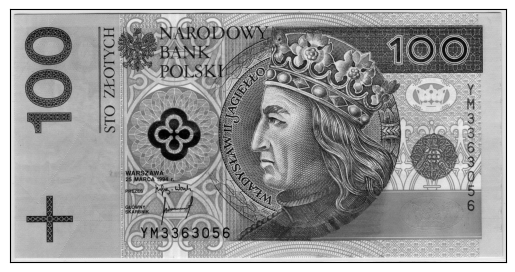

In [7]:
banknot = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
draw(banknot)

In [10]:
import numpy as np
mask = np.ones(banknot.shape, np.uint8)
bit_decomposition = []

banknot_decompose = banknot.copy()
for i in range(8):
    bit_image = cv2.bitwise_and(banknot_decompose, mask)
    bit_decomposition.append(bit_image)
    banknot_decompose = banknot_decompose >> 1

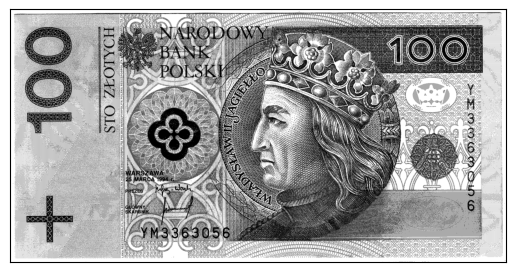

In [36]:
reconstruction_1 = cv2.add(bit_decomposition[7]*2**7, bit_decomposition[6]*2**6)
draw(reconstruction_1)

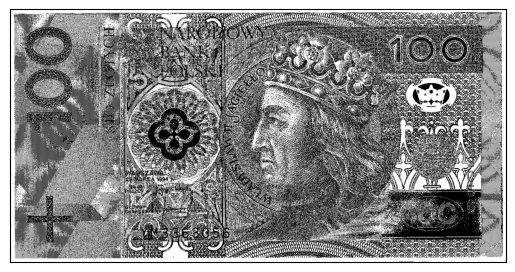

In [37]:
reconstruction_2 = cv2.add(bit_decomposition[6]*2**6, bit_decomposition[6]*2**5)
draw(reconstruction_2)

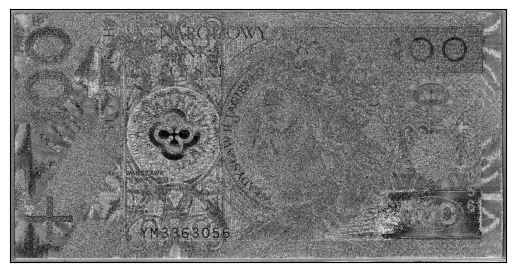

In [45]:
reconstruction_2 = bit_decomposition[5]*2**5 + bit_decomposition[4]*2**4 + bit_decomposition[3]*2**3 + bit_decomposition[2]*2**2 
draw(reconstruction_2)